In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import  cosine_similarity
from inference_utils.pytorch_data_utils import __loadCLSembeddings__
from inference_utils.pytorch_data_utils import __loadtrainingdf__
from rdkit import Chem
import scipy
import matplotlib.pyplot as plt
from turtle import color
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from inference_utils.pytorch_data_utils import __loadCLSembeddings__
from inference_utils.pytorch_data_utils import __loadtrainingdf__
from sklearn.manifold import TSNE


/home/edelin/.conda/envs/trident_plot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train1_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold1_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val1_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold1_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train2_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold2_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val2_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold2_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train3_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold3_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val3_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold3_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train4_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold4_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val4_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold4_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train5_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold5_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val5_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold5_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train6_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold6_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val6_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold6_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train7_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold7_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val7_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold7_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train8_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold8_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val8_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold8_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train9_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold9_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val9_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold9_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train10_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold10_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val10_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold10_seed41_validation_results_final_epoch.pkl.zip',compression='zip')


In [3]:

train1_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold1_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val1_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold1_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train2_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold2_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val2_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold2_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train3_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold3_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val3_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold3_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train4_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold4_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val4_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold4_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train5_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold5_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val5_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold5_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train6_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold6_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val6_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold6_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train7_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold7_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val7_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold7_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train8_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold8_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val8_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold8_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train9_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold9_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val9_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold9_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train10_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold10_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val10_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold10_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')


In [4]:
train1=pd.merge(train1_data,train1_emb,on='SMILES_Canonical_RDKit')
train2=pd.merge(train2_data,train2_emb,on='SMILES_Canonical_RDKit')
train3=pd.merge(train3_data,train3_emb,on='SMILES_Canonical_RDKit')
train4=pd.merge(train4_data,train4_emb,on='SMILES_Canonical_RDKit')
train5=pd.merge(train5_data,train5_emb,on='SMILES_Canonical_RDKit')
train6=pd.merge(train6_data,train6_emb,on='SMILES_Canonical_RDKit')
train7=pd.merge(train7_data,train7_emb,on='SMILES_Canonical_RDKit')
train8=pd.merge(train8_data,train8_emb,on='SMILES_Canonical_RDKit')
train9=pd.merge(train9_data,train9_emb,on='SMILES_Canonical_RDKit')
train10=pd.merge(train10_data,train10_emb,on='SMILES_Canonical_RDKit')

val1=pd.merge(val1_data,val1_emb,on='SMILES_Canonical_RDKit')
val2=pd.merge(val2_data,val2_emb,on='SMILES_Canonical_RDKit')
val3=pd.merge(val3_data,val3_emb,on='SMILES_Canonical_RDKit')
val4=pd.merge(val4_data,val4_emb,on='SMILES_Canonical_RDKit')
val5=pd.merge(val5_data,val5_emb,on='SMILES_Canonical_RDKit')
val6=pd.merge(val6_data,val6_emb,on='SMILES_Canonical_RDKit')
val7=pd.merge(val7_data,val7_emb,on='SMILES_Canonical_RDKit')
val8=pd.merge(val8_data,val8_emb,on='SMILES_Canonical_RDKit')
val9=pd.merge(val9_data,val9_emb,on='SMILES_Canonical_RDKit')
val10=pd.merge(val10_data,val10_emb,on='SMILES_Canonical_RDKit')

In [5]:

# Put together for easier handling
dataframes = {
    "train": [train1, train2, train3, train4, train5, train6, train7, train8, train9, train10],
    "val": [val1, val2, val3, val4, val5, val6, val7, val8, val9, val10]
}


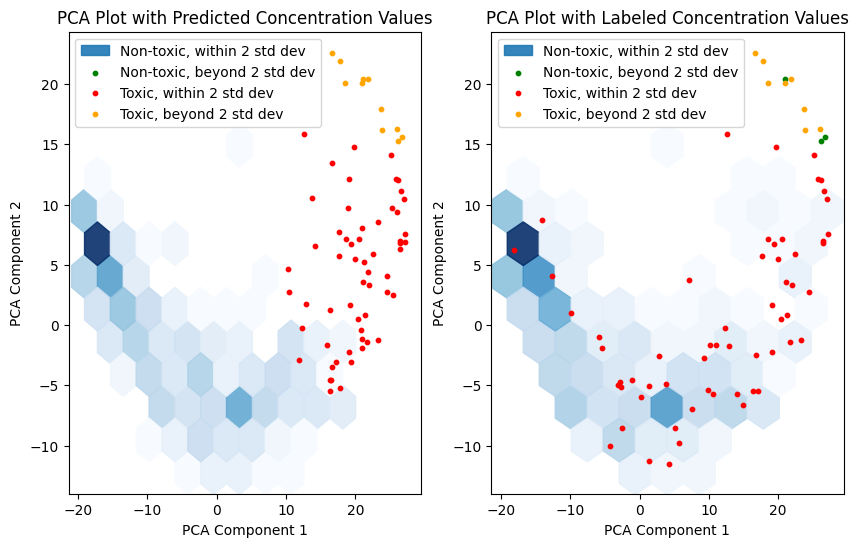

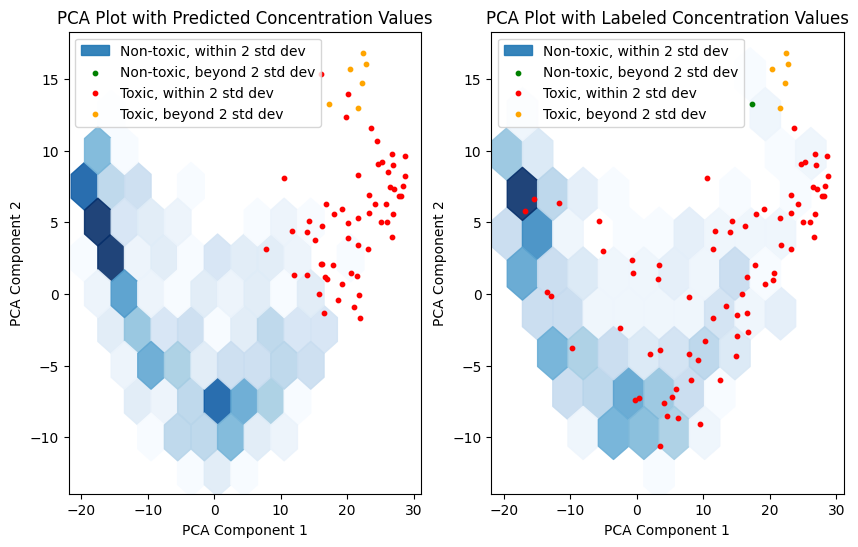

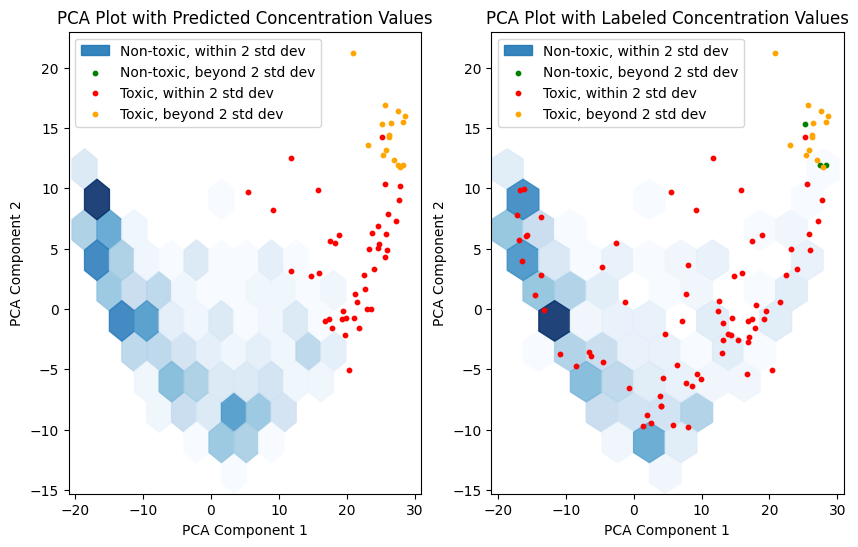

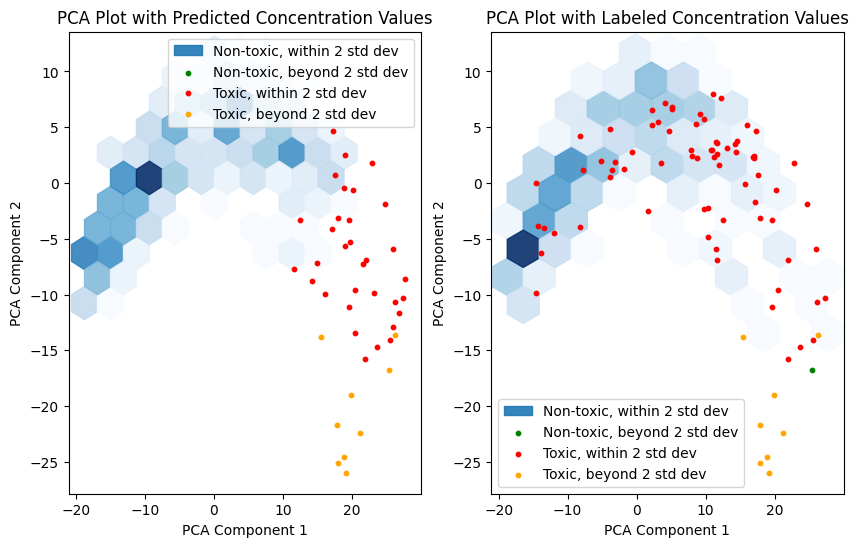

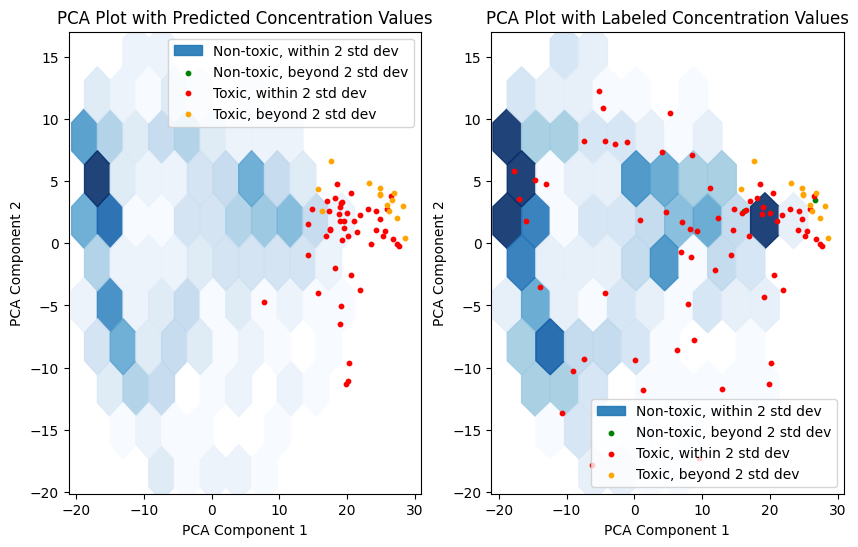

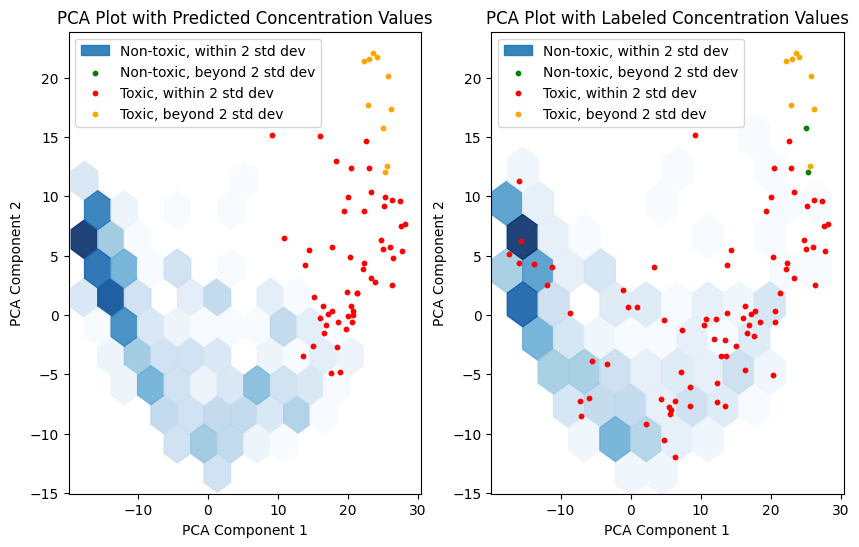

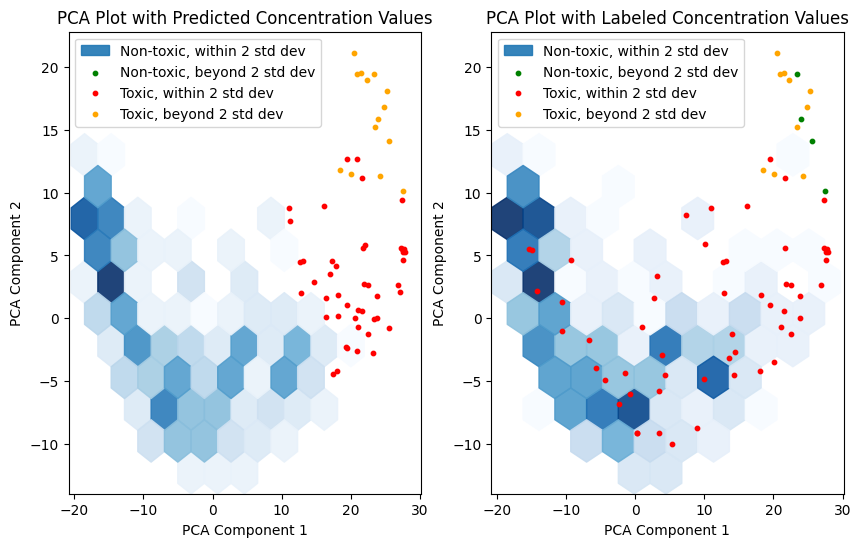

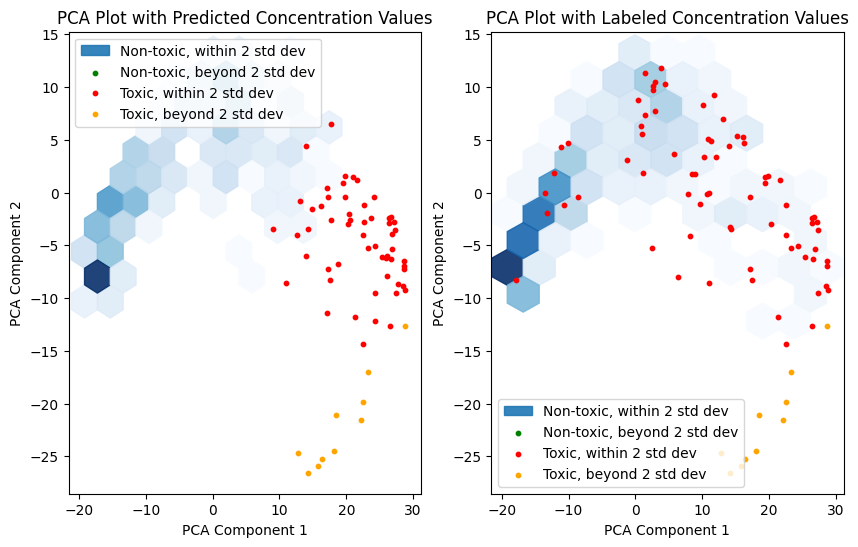

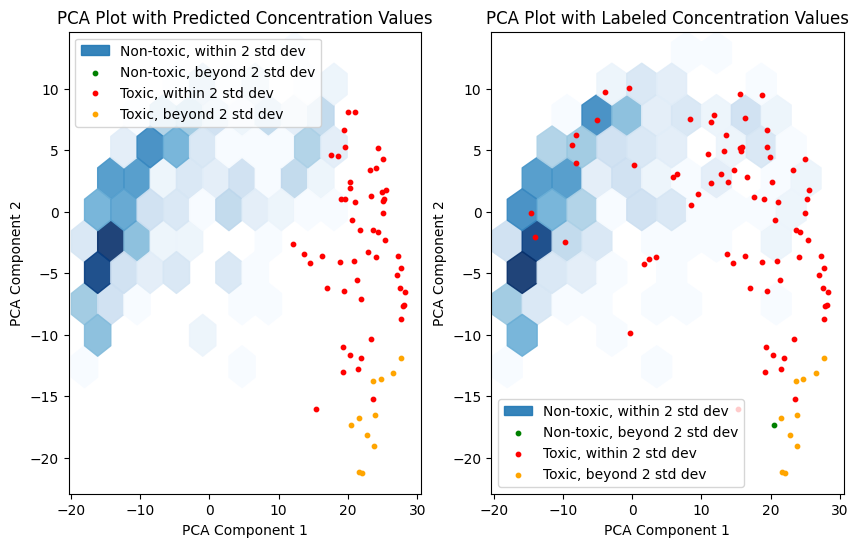

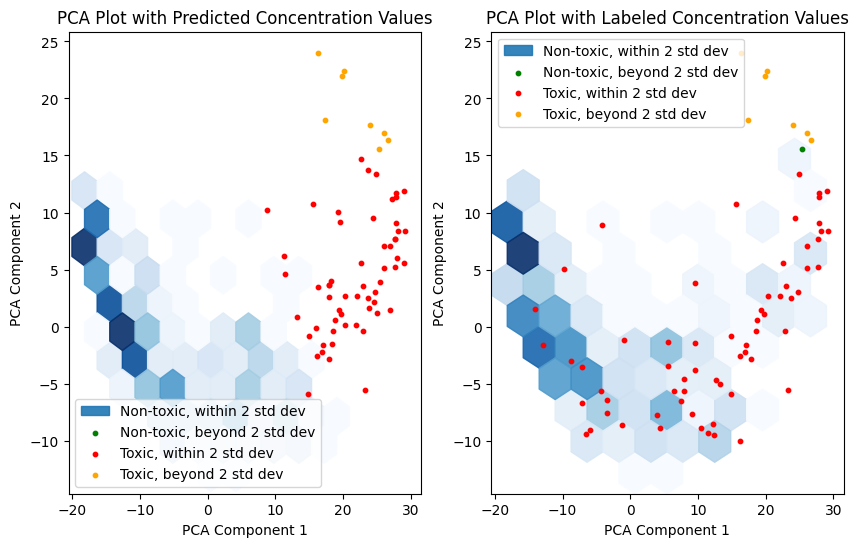

In [7]:

# Get residuals and L1 
residuals = {"train": [], "val": []}
L1_norms = {"train": [], "val": []}

for key, df_list in dataframes.items():
    for df in df_list:
        df_residuals = df['labels'] - df['preds']
        
        L1 = np.abs(df_residuals)
        
        residuals[key].append(df_residuals)
        L1_norms[key].append(L1)




def plotPCA_uncertain_newDATA2(df,threshold_value):
    inference_df = df
    embeddings = np.array(inference_df.CLS_embeddings.tolist()).astype(np.float32)

    #  PCA to the embeddings
    pcomp = PCA(n_components=2)
    pcac = pcomp.fit_transform(embeddings)
    projections = pd.DataFrame({'pc1': pcac[:, 0], 'pc2': pcac[:, 1]})
    inference_df = pd.concat([inference_df, projections], axis=1)

    threshold_value = 0.01
    inference_df['is toxic pred'] = (inference_df['preds']  < threshold_value).astype(int)
    inference_df['is toxic label'] = (inference_df['labels']  < threshold_value).astype(int)
    inference_df['is uncertain'] = (abs(inference_df['z-score mean cosine similarity']) > 2).astype(int)

    fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot non-toxic points within 2 standard deviations (in blue)
    axs[0].hexbin(inference_df[(inference_df['is toxic pred']==0) & (inference_df['is uncertain']==0)]['pc1'], 
                inference_df[(inference_df['is toxic pred']==0) & (inference_df['is uncertain']==0)]['pc2'], 
                cmap='Blues',mincnt=1, alpha=0.9, gridsize=10,label='Non-toxic, within 2 std dev')

    # Plot uncertain (non-toxic) points beyond 2 standard deviations (in green)
    axs[0].scatter(inference_df[(inference_df['is toxic pred']==0) & (inference_df['is uncertain']==1)]['pc1'], 
                inference_df[(inference_df['is toxic pred']==0) & (inference_df['is uncertain']==1)]['pc2'], 
                color='green',s=10, label='Non-toxic, beyond 2 std dev')

    # Plot toxic points within 2 standard deviations (in red)
    axs[0].scatter(inference_df[(inference_df['is toxic pred']==1) & (inference_df['is uncertain']==0)]['pc1'], 
                inference_df[(inference_df['is toxic pred']==1) & (inference_df['is uncertain']==0)]['pc2'], 
                color='red', s=10, label='Toxic, within 2 std dev')

    # Plot toxic points beyond 2 standard deviations (in orange)
    axs[0].scatter(inference_df[(inference_df['is toxic pred']==1) & (inference_df['is uncertain']==1)]['pc1'], 
                inference_df[(inference_df['is toxic pred']==1) & (inference_df['is uncertain']==1)]['pc2'], 
                color='orange', s=10, label='Toxic, beyond 2 std dev')

    
    axs[0].set_xlabel('PCA Component 1')
    axs[0].set_ylabel('PCA Component 2')
    axs[0].set_title('PCA Plot with Predicted Concentration Values')
    axs[0].legend()
  

    axs[1].hexbin(inference_df[(inference_df['is toxic label']==0) & (inference_df['is uncertain']==0)]['pc1'], 
                inference_df[(inference_df['is toxic label']==0) & (inference_df['is uncertain']==0)]['pc2'], 
                cmap='Blues', alpha=0.9,mincnt=1,gridsize=10, label='Non-toxic, within 2 std dev')

    # Plot uncertain (non-toxic) points beyond 2 standard deviations (in green)
    axs[1].scatter(inference_df[(inference_df['is toxic label']==0) & (inference_df['is uncertain']==1)]['pc1'], 
                inference_df[(inference_df['is toxic label']==0) & (inference_df['is uncertain']==1)]['pc2'], 
                color='green', s=10, label='Non-toxic, beyond 2 std dev')

    # Plot toxic points within 2 standard deviations (in red)
    axs[1].scatter(inference_df[(inference_df['is toxic label']==1) & (inference_df['is uncertain']==0)]['pc1'], 
                inference_df[(inference_df['is toxic label']==1) & (inference_df['is uncertain']==0)]['pc2'], 
                color='red', s=10, label='Toxic, within 2 std dev')

    # Plot toxic points beyond 2 standard deviations (in orange)
    axs[1].scatter(inference_df[(inference_df['is toxic label']==1) & (inference_df['is uncertain']==1)]['pc1'], 
                inference_df[(inference_df['is toxic label']==1) & (inference_df['is uncertain']==1)]['pc2'], 
                color='orange', s=10, label='Toxic, beyond 2 std dev')

    
    axs[1].set_xlabel('PCA Component 1')
    axs[1].set_ylabel('PCA Component 2')
    axs[1].set_title('PCA Plot with Labeled Concentration Values')
    axs[1].legend()
    
    return fig


threshold_value = 0.1 # since we have EC50
for i in range(0,10):
    embeddings_training=np.asarray(dataframes['train'][i].CLS_embeddings.tolist(),dtype=np.float32)
    embeddings_val=np.asarray(dataframes['val'][i].CLS_embeddings.tolist(),dtype=np.float32)
    val_data=dataframes['val'][i]
    val_data['mean cosine similarity']=cosine_similarity(embeddings_val).mean(axis=0)

    train_cosine={}
    train_cosine['mean cosine similarity']=cosine_similarity(embeddings_training).mean(axis=0)
    train_cosine_df=pd.DataFrame(train_cosine)

    mean_tot=sum(train_cosine_df['mean cosine similarity'])/len(train_cosine_df['mean cosine similarity'])
    std_dev_tot=train_cosine_df['mean cosine similarity'].std()
    # Calculate z-score
    val_data['z-score mean cosine similarity']=(val_data['mean cosine similarity']-mean_tot)/std_dev_tot
    
    plotPCA_uncertain_newDATA2(val_data,threshold_value=threshold_value)
    

Looking at the PCA plot for new data

In [8]:
def plotPCA_uncertain_newDATA2(df,threshold_value):
    inference_df = df
    embeddings = np.array(inference_df.CLS_embeddings.tolist()).astype(np.float32)

    #  PCA to the embeddings
    pcomp = PCA(n_components=2)
    pcac = pcomp.fit_transform(embeddings)
    projections = pd.DataFrame({'pc1': pcac[:, 0], 'pc2': pcac[:, 1]})
    inference_df = pd.concat([inference_df, projections], axis=1)

    threshold_value = 0.01
    inference_df['is toxic pred'] = (inference_df['preds']  < threshold_value).astype(int)
    inference_df['is toxic label'] = (inference_df['labels']  < threshold_value).astype(int)
    inference_df['is uncertain'] = (abs(inference_df['z-score mean cosine similarity']) > 2).astype(int)

    fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot non-toxic points within 2 standard deviations (in blue)
    axs[0].hexbin(inference_df[(inference_df['is toxic pred']==0) & (inference_df['is uncertain']==0)]['pc1'], 
                inference_df[(inference_df['is toxic pred']==0) & (inference_df['is uncertain']==0)]['pc2'], 
                cmap='Blues',mincnt=1, alpha=0.9, gridsize=10,label='Non-toxic, within 2 std dev')

    # Plot uncertain (non-toxic) points beyond 2 standard deviations (in green)
    axs[0].scatter(inference_df[(inference_df['is toxic pred']==0) & (inference_df['is uncertain']==1)]['pc1'], 
                inference_df[(inference_df['is toxic pred']==0) & (inference_df['is uncertain']==1)]['pc2'], 
                color='green',s=10, label='Non-toxic, beyond 2 std dev')

    # Plot toxic points within 2 standard deviations (in red)
    axs[0].scatter(inference_df[(inference_df['is toxic pred']==1) & (inference_df['is uncertain']==0)]['pc1'], 
                inference_df[(inference_df['is toxic pred']==1) & (inference_df['is uncertain']==0)]['pc2'], 
                color='red', s=10, label='Toxic, within 2 std dev')

    # Plot toxic points beyond 2 standard deviations (in orange)
    axs[0].scatter(inference_df[(inference_df['is toxic pred']==1) & (inference_df['is uncertain']==1)]['pc1'], 
                inference_df[(inference_df['is toxic pred']==1) & (inference_df['is uncertain']==1)]['pc2'], 
                color='orange', s=10, label='Toxic, beyond 2 std dev')

    
    axs[0].set_xlabel('PCA Component 1')
    axs[0].set_ylabel('PCA Component 2')
    axs[0].set_title('PCA Plot with Predicted Concentration Values')
    axs[0].legend()
  

    axs[1].hexbin(inference_df[(inference_df['is toxic label']==0) & (inference_df['is uncertain']==0)]['pc1'], 
                inference_df[(inference_df['is toxic label']==0) & (inference_df['is uncertain']==0)]['pc2'], 
                cmap='Blues', alpha=0.9,mincnt=1,gridsize=10, label='Non-toxic, within 2 std dev')

    # Plot uncertain (non-toxic) points beyond 2 standard deviations (in green)
    axs[1].scatter(inference_df[(inference_df['is toxic label']==0) & (inference_df['is uncertain']==1)]['pc1'], 
                inference_df[(inference_df['is toxic label']==0) & (inference_df['is uncertain']==1)]['pc2'], 
                color='green', s=10, label='Non-toxic, beyond 2 std dev')

    # Plot toxic points within 2 standard deviations (in red)
    axs[1].scatter(inference_df[(inference_df['is toxic label']==1) & (inference_df['is uncertain']==0)]['pc1'], 
                inference_df[(inference_df['is toxic label']==1) & (inference_df['is uncertain']==0)]['pc2'], 
                color='red', s=10, label='Toxic, within 2 std dev')

    # Plot toxic points beyond 2 standard deviations (in orange)
    axs[1].scatter(inference_df[(inference_df['is toxic label']==1) & (inference_df['is uncertain']==1)]['pc1'], 
                inference_df[(inference_df['is toxic label']==1) & (inference_df['is uncertain']==1)]['pc2'], 
                color='orange', s=10, label='Toxic, beyond 2 std dev')

    
    axs[1].set_xlabel('PCA Component 1')
    axs[1].set_ylabel('PCA Component 2')
    axs[1].set_title('PCA Plot with Labeled Concentration Values')
    axs[1].legend()
    
    return fig


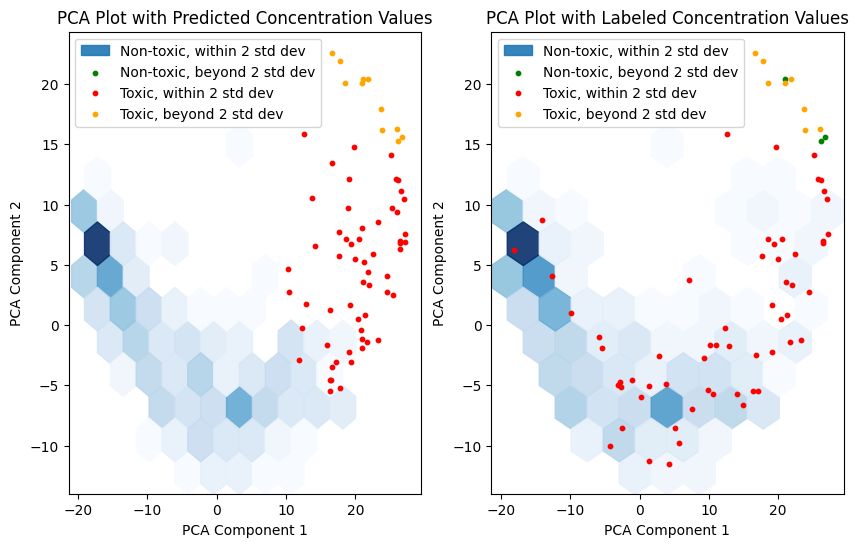

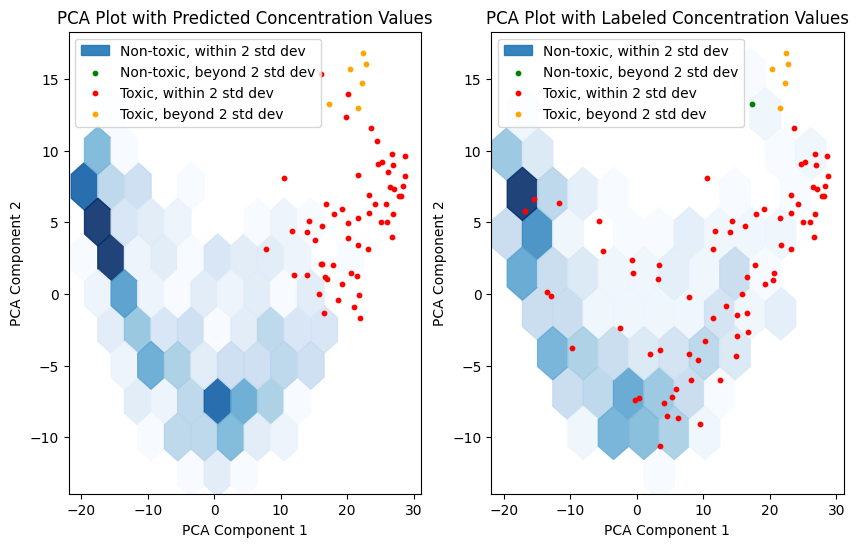

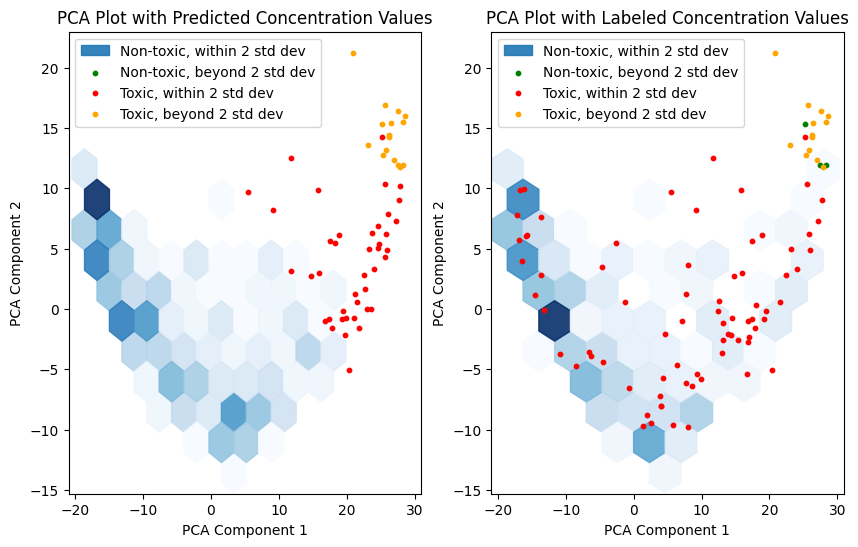

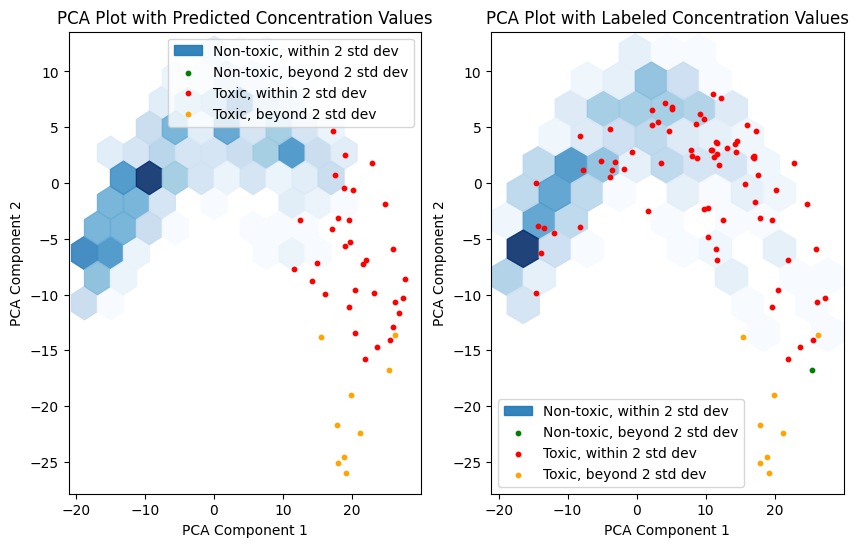

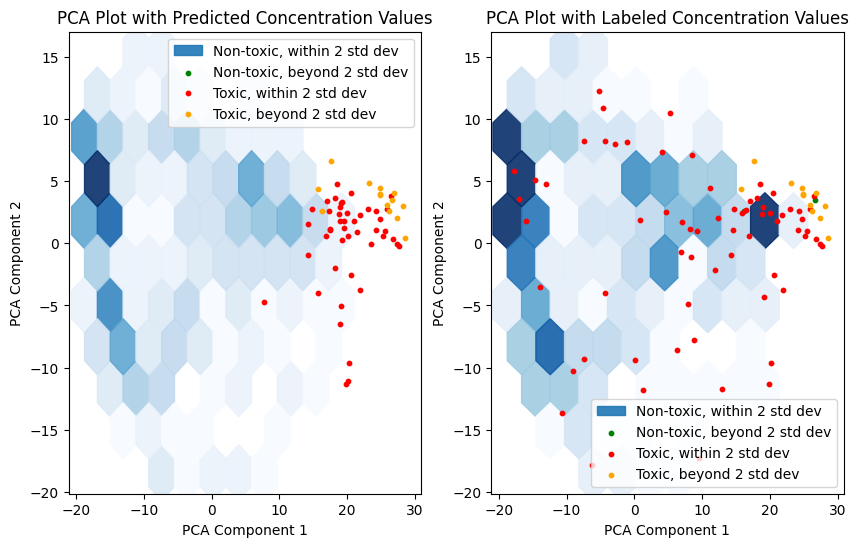

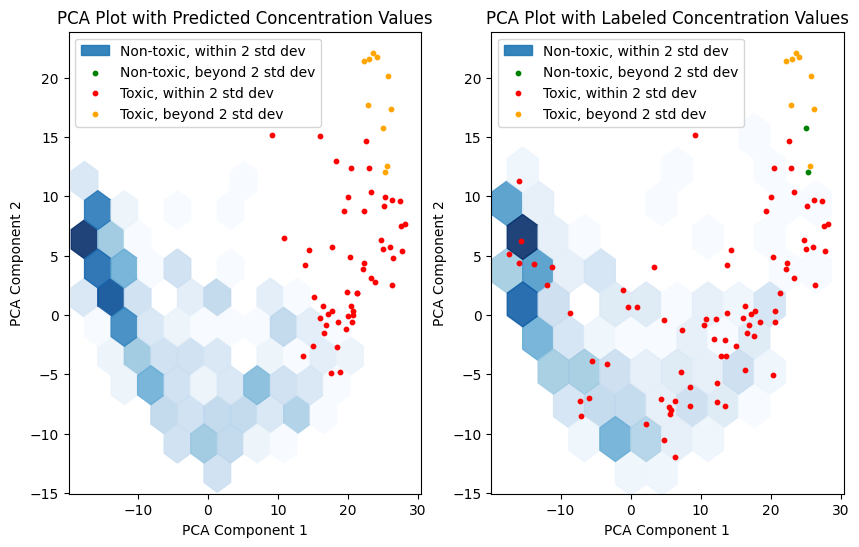

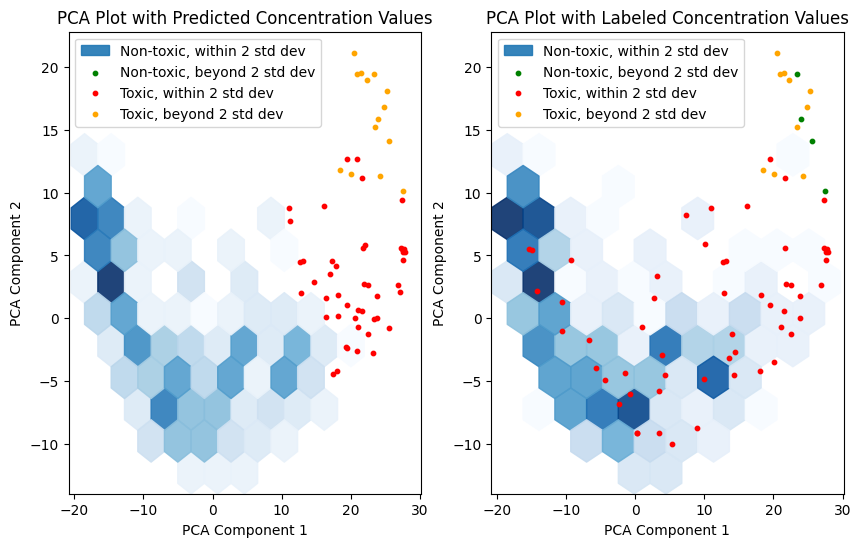

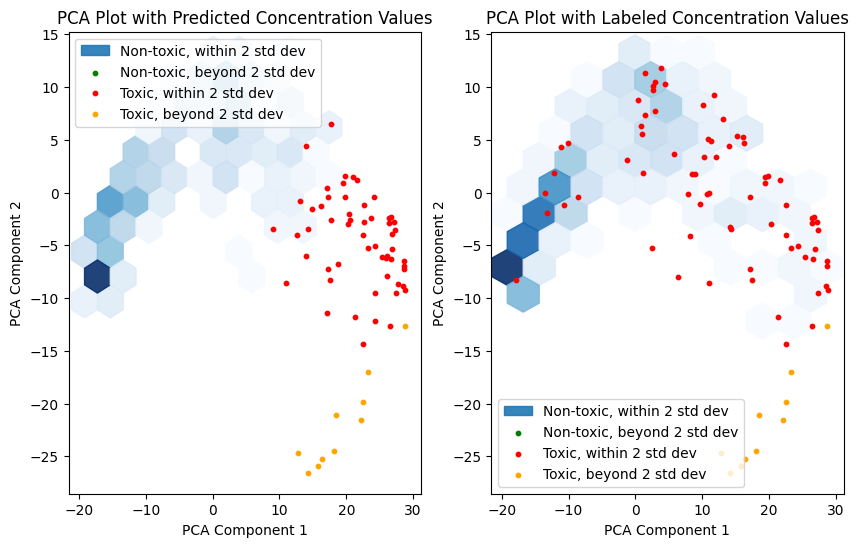

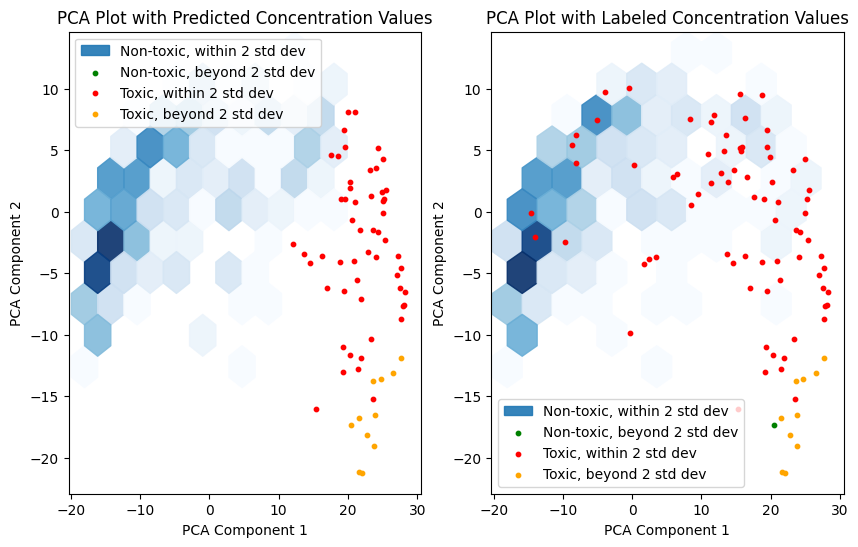

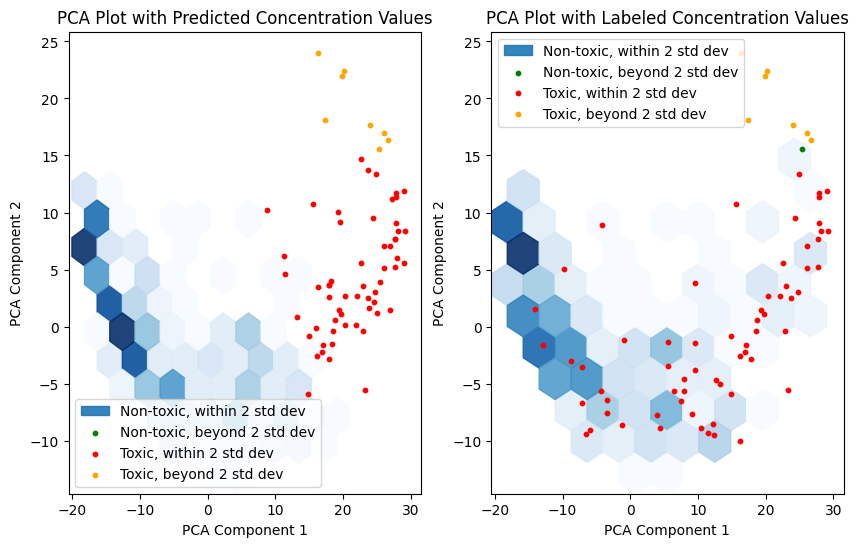

In [9]:
#from t24_fun import plotPCA_toxic_newDATA2, plotPCA_uncertain_newDATA2
threshold_value = 0.1 # since we have EC50
figs = {}
for i in range(0,10):
    embeddings_training=np.asarray(dataframes['train'][i].CLS_embeddings.tolist(),dtype=np.float32)
    embeddings_val=np.asarray(dataframes['val'][i].CLS_embeddings.tolist(),dtype=np.float32)
    val_data=dataframes['val'][i]
    val_data['mean cosine similarity']=cosine_similarity(embeddings_val).mean(axis=0)

    train_cosine={}
    train_cosine['mean cosine similarity']=cosine_similarity(embeddings_training).mean(axis=0)
    train_cosine_df=pd.DataFrame(train_cosine)

    mean_tot=sum(train_cosine_df['mean cosine similarity'])/len(train_cosine_df['mean cosine similarity'])
    std_dev_tot=train_cosine_df['mean cosine similarity'].std()
    # Calculate z-score
    #train_cosine_df['z-score mean cosine similarity']=(train_cosine_df['mean cosine similarity']-mean_tot)/std_dev_tot
    val_data['z-score mean cosine similarity']=(val_data['mean cosine similarity']-mean_tot)/std_dev_tot
    
    figs[f"fig_f{i}"] = plotPCA_uncertain_newDATA2(val_data, threshold_value=threshold_value)
    #plotPCA_toxic_newDATA2(val_data,threshold_value=threshold_value) 
    #plotPCA_uncertain_newDATA2(val_data,threshold_value=threshold_value)
    

In [15]:
figs['fig_f0'].savefig("pca_fold1.pdf",format='pdf')
figs['fig_f1'].savefig("pca_fold2.pdf",format='pdf')
figs['fig_f2'].savefig("pca_fold3.pdf",format='pdf')
figs['fig_f3'].savefig("pca_fold4.pdf",format='pdf')
figs['fig_f4'].savefig("pca_fold5.pdf",format='pdf')
figs['fig_f5'].savefig("pca_fold6.pdf",format='pdf')
figs['fig_f6'].savefig("pca_fold7.pdf",format='pdf')
figs['fig_f7'].savefig("pca_fold8.pdf",format='pdf')
figs['fig_f8'].savefig("pca_fold9.pdf",format='pdf')
figs['fig_f9'].savefig("pca_fold10.pdf",format='pdf')

Get suspect chemicals, chemicals with labeled values and predicted values that does not agree. 
- Chemicals that are located in regions of the PCA plot that are typically occupied by non-toxic chemicals, PC1 < 0, but whose labeled value classify them as toxic
- or chemicals whose labeled values classify them as non-toxic that have a cosine similarity z-score beyond two standard deviations from the training data’s mean cosine similarity


In [ ]:

def suspicous_chem(df,threshold_value):
    inference_df = df
    embeddings = np.array(inference_df.CLS_embeddings.tolist()).astype(np.float32)

    #  PCA to the embeddings
    pcomp = PCA(n_components=2)
    pcac = pcomp.fit_transform(embeddings)
    projections = pd.DataFrame({'pc1': pcac[:, 0], 'pc2': pcac[:, 1]})
    inference_df = pd.concat([inference_df, projections], axis=1)

    threshold_value = 0.01
    inference_df['is toxic pred'] = (inference_df['preds']  < threshold_value).astype(int)
    inference_df['is toxic label'] = (inference_df['labels']  < threshold_value).astype(int)
    inference_df['is uncertain'] = (abs(inference_df['z-score mean cosine similarity']) > 2).astype(int)

    possible_nontoxic=inference_df[(inference_df['is toxic label']==1) & (inference_df['is uncertain']==0) & (inference_df['pc1']<0)]
    suspicious_chemicals=inference_df[(inference_df['is toxic label']==0) & (inference_df['is uncertain']==1)]

    return possible_nontoxic,suspicious_chemicals





In [39]:
train_df=__loadtrainingdf__(MODELTYPE='EC50',PREDICTION_SPECIES='fish',PREDICTION_ENDPOINT='EC50')
train_df.drop_duplicates(subset=['CAS'])
combined_for_info=pd.merge(val_data,train_df, on='SMILES_Canonical_RDKit',how='left')

In [ ]:
threshold_value = 0.1 # since we have EC50

for i in range(0,10):
    embeddings_training=np.asarray(dataframes['train'][i].CLS_embeddings.tolist(),dtype=np.float32)
    embeddings_val=np.asarray(dataframes['val'][i].CLS_embeddings.tolist(),dtype=np.float32)
    val_data=dataframes['val'][i]
    val_data['mean cosine similarity']=cosine_similarity(embeddings_val).mean(axis=0)

    train_cosine={}
    train_cosine['mean cosine similarity']=cosine_similarity(embeddings_training).mean(axis=0)
    train_cosine_df=pd.DataFrame(train_cosine)

    mean_tot=sum(train_cosine_df['mean cosine similarity'])/len(train_cosine_df['mean cosine similarity'])
    std_dev_tot=train_cosine_df['mean cosine similarity'].std()
    # Calculate z-score
    val_data['z-score mean cosine similarity']=(val_data['mean cosine similarity']-mean_tot)/std_dev_tot
    train_df=__loadtrainingdf__(MODELTYPE='EC50',PREDICTION_SPECIES='fish',PREDICTION_ENDPOINT='EC50')
    train_df.drop_duplicates(subset=['CAS'])
    combined_for_info=pd.merge(val_data,train_df, on='SMILES_Canonical_RDKit',how='left')
    p_nontoxic,s_chemicals=suspicous_chem(combined_for_info,threshold_value=threshold_value)

    latex_table_p = p_nontoxic[['CAS', 'cmpdname_x']].to_latex(index=False)
    print('p_nontoxic')
    print(latex_table_p)  
    latex_table_s = s_chemicals[['CAS', 'cmpdname_x']].to_latex(index=False)
    print('s_chemicals')
    print(latex_table_s) 



p_nontoxic
\begin{tabular}{ll}
\toprule
CAS & cmpdname_x \\
\midrule
75-86-5 & Acetone cyanohydrin \\
741-58-2 & Bensulide \\
63449-39-8 & Chlorowax 40 \\
593-08-8 & 2-Tridecanone \\
111-85-3 & 1-Chlorooctane \\
2437-29-8 & Malachite Green Oxalate \\
300-76-5 & Naled \\
106-50-3 & p-Phenylenediamine \\
643-79-8 & o-Phthalaldehyde \\
10108-73-3 & Cerium nitrate \\
100-25-4 & 1,4-Dinitrobenzene \\
1306-25-8 & Cadmium telluride \\
\bottomrule
\end{tabular}

s_chemicals
\begin{tabular}{ll}
\toprule
CAS & cmpdname_x \\
\midrule
17109-49-8 & Edifenphos \\
23149-52-2 & Thiosulfuric acid (H2S2O3), silver(1+) salt (1:2) \\
506-64-9 & Silver cyanide \\
\bottomrule
\end{tabular}

p_nontoxic
\begin{tabular}{ll}
\toprule
CAS & cmpdname_x \\
\midrule
281-23-2 & Adamantane \\
78-95-5 & Chloroacetone \\
2778-42-9 & 1,3-Bis(1-isocyanato-1-methylethyl)benzene \\
6257-64-3 & Benzenamine, 4,4'-azobis[N,N-dimethyl- \\
21564-17-0 & 2-(Thiocyanomethylthio)benzothiazole \\
591-89-9 & Mercuric potassium cyanid